In [1]:
# Manipulación de datos
import pandas as pd
# Operaciones numéricas
import numpy as np
# Creación de gráficos
import matplotlib.pyplot as plt
from time import time
# Herramientas de SVM
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

# Nuevo
from sklearn.metrics import confusion_matrix

In [3]:
# Leer el set de datos y consultar información básica
df = pd.read_csv('digitos.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
# Consultar los primeros registros del set de datos
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [6]:
df['label'].hist()

In [7]:
# Obtener una sección del DataFrame usando los números de columna
pixeles = df.iloc[:,1:785] # x
digitos = df.iloc[:,0:1] # y

In [8]:
# Separar datos para entrenar y para probar
X_train, X_test, y_train, y_test = train_test_split(
    pixeles,
    digitos,
    test_size=0.5
)

In [9]:
# Consultar información de la muestra de entrenamiento
X_train.shape

(21000, 784)

In [10]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
35088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4864,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33545,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
def mostrar_num(in_data):
    """Genera un gráfico que muestra un registro
    del set de datos.
    Para ello, convierte el array de 1 dimensión en
    una matriz de 28x28.
    """
    matriz = np.array(in_data.values)
    plt.imshow(matriz.reshape(28, 28))

In [12]:
X_test.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4807,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39543,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28599,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1949,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
mostrar_num(X_test.iloc[3])

In [14]:
# Creación del modelo
modelo = SVC(kernel='linear')

In [15]:
# Entrenamiento
hora_inicio = time()
modelo.fit(X_train.values, y_train.values.ravel())
print('Entrenamiento terminado en {}'.format(time() - hora_inicio))

Entrenamiento terminado en 57.171560287475586


In [17]:
# Crear predicción de datos
hora_inicio = time()
y_pred = modelo.predict(X_test.values)
print('Predicción terminada en {}'.format(time() - hora_inicio))
print(y_pred.shape)

Predicción terminada en 79.95461630821228
(21000,)


In [20]:
precision = accuracy_score(y_test, y_pred)
print('Precisión: {}'.format(precision))

Precisión: 0.9085238095238095


In [28]:
prueba = X_test.iloc[2000]
print('El resultado era: {}'.format(y_test.iloc[2000]))
mostrar_num(prueba)
prediccion = modelo.predict([prueba])
print('El dígito es: {}'. format(prediccion))

El resultado era: label    7
Name: 22304, dtype: int64
El dígito es: [7]


In [31]:
# Prueba con la matriz de confusión
conf = confusion_matrix(y_test, y_pred)

In [32]:
conf

array([[2018,    0,   13,    3,    6,    9,   23,    0,    8,    1],
       [   1, 2304,   11,    6,    1,    3,    3,    5,   21,    2],
       [  12,   24, 1913,   46,   14,    7,   19,   19,   27,    5],
       [   5,   18,   53, 1885,    2,  101,    8,   15,   45,   16],
       [   4,    5,   31,    6, 1880,    2,    7,   17,    4,   64],
       [  42,    9,   23,  106,   10, 1670,   25,    0,   39,   16],
       [  14,    2,   37,    2,   19,   24, 1957,    0,    9,    0],
       [   8,    6,   37,   18,   28,    4,    1, 2037,    4,   90],
       [  17,   44,   43,  109,    7,   77,   14,   13, 1678,   16],
       [  15,   11,   12,   27,  119,   16,    2,   95,   19, 1737]])

In [33]:
def plot_cm(cm, classes):
    """Esta función se encarga de generar un gráfico con nuestra matriz de confusión.
    cm es la matriz generada por confusion_matrix
    classes es una lista que contiene las posibles clases que puede predecir nuestro modelo
    """
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title('Matriz de confusión')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for indice_fila, fila in enumerate(cm):
        for indice_columna, columna in enumerate(fila):
            if cm[indice_fila, indice_columna] > thresh:
                color = "white"
            else:
                color = "black"
            plt.text(
                indice_columna,
                indice_fila,
                cm[indice_fila, indice_columna],
                color=color,
                horizontalalignment="center"
            )
    plt.ylabel("Valores reales")
    plt.xlabel("Valores calculados")
    plt.show()

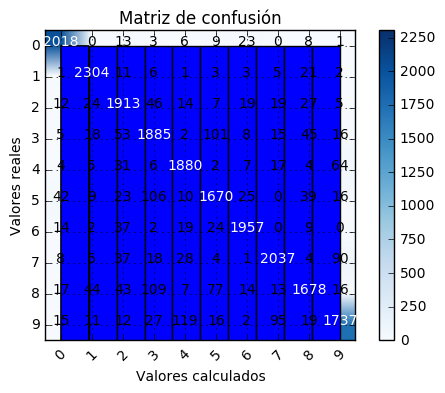

In [34]:
plot_cm(conf, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])